In [1]:
"""
Author 1: Sai Mahesh
Roll No: CS18BTECH11001

Author 2: Vamshi Krishna Reddy
Roll No: CS18BTECH11024

Author 3: Sai Varshittha
Roll No: CS18BTECH11035
"""

'\nAuthor 1: Sai Mahesh\nRoll No: CS18BTECH11001\n\nAuthor 2: Vamshi Krishna Reddy\nRoll No: CS18BTECH11024\n\nAuthor 3: Sai Varshittha\nRoll No: CS18BTECH11035\n'

In [2]:
# Modules to be used
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import pathlib
import matplotlib.pyplot as plt 
from sklearn import preprocessing

In [3]:
# Dataset to be used for importing stock flow graph
PATH = pathlib.Path('./spec.csv')

In [4]:
# create data and adjacency matrix for the graph
def Preprocessing(path: pathlib.Path):
    df = pd.read_csv(path)
    X =  preprocessing.normalize(df.to_numpy())
    return guassianSimilarity(X,k=9,sigma=1)

In [5]:
# returns sqrt of inverse a given matrix 
def sqrtInv(D):
    Dinv = np.linalg.inv(D)
    return np.sqrt(Dinv)

In [6]:
# plot of eigen values
def plotGraph(vals):
    plt.ylabel('EigenValues')
    plt.xlabel('K-values')
    plt.plot(vals, color='b', marker='o', linestyle='--')
    plt.savefig('K-values vs EigenValues_asg4.png')

In [7]:
# returns adjacency matrix for the graph
def guassianSimilarity(X,k,sigma):
    xLen = len(X)
    A = np.zeros((xLen,xLen))
    for i in range(xLen):
        for j in range(xLen):
            if j - i != 0:
                A[i][j] = np.exp(-1*(np.linalg.norm(X[i]-X[j])**2))/(2*(sigma**2))

# k most similar elements will be considered               
    for i in range(xLen):
        idx = np.argsort(-A[i])
        for j in range(xLen):
            if k - idx[j] < 0 :
                A[i][j] = 0

# make graph undirected by adding a reverse edge for all edges
    for i in range(xLen):
        for j in range(xLen):
            A[i][j] = max(A[i][j],A[j][i])
    return A

In [8]:
# create data and adjacency matrix for the graph
A = Preprocessing(PATH)

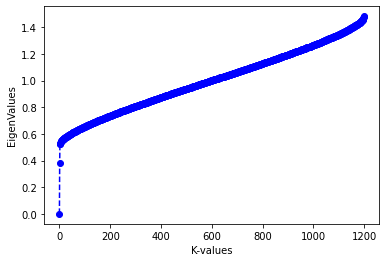

In [9]:
# create the graph laplacian
sumAx1 = A.sum(axis=1)
D = np.diag(sumAx1)
DSqrtInv = sqrtInv(D)
L = np.matmul(DSqrtInv,np.matmul(D-A, DSqrtInv))

# finding eigenvalues and eigenvectors
eigenVals, eigenVecs = np.linalg.eig(L)
# sort
tempp = eigenVals.copy()
eigenVals = eigenVals[np.argsort(eigenVals)]
eigenVecs = eigenVecs[:,np.argsort(tempp)]

# plot of eigen values
plotGraph(eigenVals)

In [10]:
# count how many clusters are there
# then find the index of maximum difference in eigen values
cluster, maxdiff, cls = -1, 0, {}
for i in range(1,len(eigenVals)-1):
    if maxdiff < eigenVals[i+1] - eigenVals[i]:
        cluster = i+1
        maxdiff= eigenVals[i+1]- eigenVals[i]

# k-mean clustering of reduced eigen vector sample space
kmeans = KMeans(n_clusters=cluster)
kmeans.fit(eigenVecs[:,1:cluster])
colors = kmeans.labels_

#counting of samples in each clusters
for i in colors:
    if i not in cls.keys():
        cls[i] = 0
    cls[i] += 1
print('Eigenvalues :',eigenVals)
print('No. of clusters = ',cluster)
print("Clusters:", colors)
print('Number of samples in these ',cluster,' clusters are:' ,cls)

Eigenvalues : [1.77572362e-16 3.81760065e-01 5.22412058e-01 ... 1.47087630e+00
 1.47355397e+00 1.48291086e+00]
No. of clusters =  2
Clusters: [1 0 1 ... 0 0 0]
Number of samples in these  2  clusters are: {1: 343, 0: 856}
